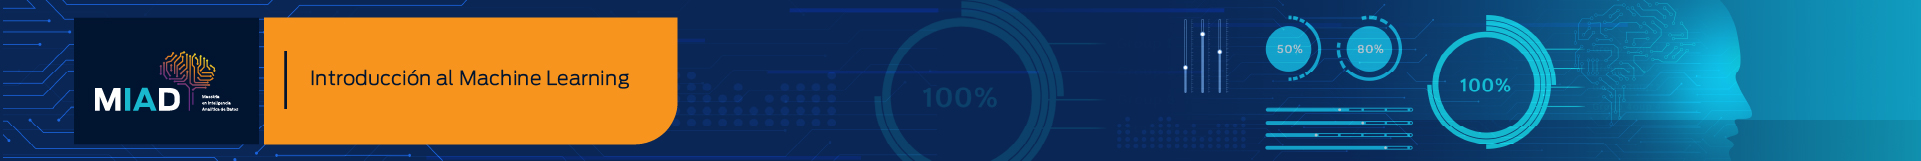

# Introducción al Machine Learning - Semana 2
## Caso: Modelos lineales para regresión, muestreo y selección del mejor modelo

### Propósito de la actividad

En esta actividad podrán poner en práctica, con un conjunto de datos reales, su habilidad para implementar modelos lineales y seleccionar aquel que tenga el mejor desempeño para resolver un problema de regresión. En particular, se deberán implementar modelos lineales de componentes principales, partial least squares y regularización.

Además, como en todo procedimiento de analítica de datos, se evaluará la exploración preliminar de los datos por medio de herramientas como histogramas, correlogramas y estadísticas descriptivas.

### Instrucciones generales

1. Para desarrollar el notebook, lo deberán descargar a un repositorio (pueden escoger el repositorio de su preferencia) para que lo puedan trabajar grupalmente.

2. Los procedimientos en el notebook deberán responderse en los espacios especificados para tal fin, debajo de cada uno de los puntos.

3. Para que la actividad sea calificada, deberán subir únicamente este mismo archivo con la extensión ".ipynb" a la actividad de "entrega calificada por el personal" correspondiente a este caso.

4. El archivo que suban debe poder ejecutarse localmente cuando sea descargado por el tutor, asumiendo que la base de datos de la actividad ya ha sido importada en el correspondiente archivo separado por comas (.csv).

### Criterios de evaluación

Los criterios que se evaluarán son:   

Análisis preliminar de variables: Se presentan correlogramas, histogramas y estadísticas descriptivas de las variables de la base de datos y se hace un análisis coherente de cada uno de ellos. [10 puntos] 

Estimación del modelo usando componentes principales: Se estima el modelo usando componentes principales, se evalúa su desempeño en la muestra de test y se analizan correctamente los resultados y el procedimiento realizado. [20 puntos] 

Estimación del modelo usando PCA y el método forward: Se estima el modelo usando el método forward con componentes principales, se responde si es el mismo modelo del punto 2, se evalúa su desempeño en la muestra de test y se analizan correctamente los resultados y el procedimiento realizado. [30 puntos] 

Estimación del modelo de partial least squares: Se estima el modelo usando partial least squares, se evalúa en la muestra de test y se analizan correctamente los resultados y el procedimiento realizado. [20 puntos] 

Estimación de un modelo de penalización: Se estima algún modelo de penalización, se evalúa en la muestra de test y se analizan correctamente los resultados y el procedimiento realizado. [15 puntos] 

Elección del mejor modelo: Se elige el mejor modelo de acuerdo a los resultados obtenidos y se justifica adecuadamente la elección. [5 puntos] 


### Datos

Existe gran variedad de bases de datos reales disponibles en internet usadas por la comunidad académica para la evaluación de modelos predictivos.

En esta ocasión usarán una base de datos disponible en la página R-Data. Esta base de datos corresponde a "Hitters", la cual contiene 20 variables de jugadores de la Major League Baseball en las temporadas de 1986 y 1987. De esta manera, el objetivo de la actividad es predecir el salario de un jugador basado en las características que describen las variables predictivas.

Por lo anterior, en primer lugar deberán descargar la base de datos del siguiente enlace: https://r-data.pmagunia.com/dataset/r-dataset-package-islr-hitters

Finalmente, para resolver los puntos de esta actividad deberán tener en cuenta únicamente las variables continuas (se deben eliminar las variables categóricas) y deberán eliminar las observaciones con datos faltantes.


In [15]:
#### Importar librerías

import numpy as np
from numpy import genfromtxt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNetCV
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
# Importar y ajustar datos con Pandas

data = pd.read_csv('Hitters.csv')
data_df = pd.DataFrame(data)
data_df = data_df.drop(columns = ['League', 'Division','NewLeague'])
data_df = data_df.dropna(axis = 0)
XTotalAuxiliar = data_df.iloc[:,0:16]
yTotalAuxiliar = pd.DataFrame(data_df.iloc[:,-1])
data_numpy_array = data_df.to_numpy()
XTotal = data_numpy_array[:,0:16]
XTotal.shape
yTotal = data_numpy_array[:,-1]
yTotal.shape
XTrain, XTest, yTrain, yTest = train_test_split(XTotal, yTotal, test_size=0.33, random_state=0)
data_df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
-Alan Ashby,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10,475.0
-Alvin Davis,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14,480.0
-Andre Dawson,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3,500.0
-Andres Galarraga,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4,91.5
-Alfredo Griffin,594,169,4,74,51,35,11,4408,1133,19,501,336,194,282,421,25,750.0


### 1. Análisis preliminar de variables (10 puntos)
Realicen un análisis preliminar de los predictores y de la variable de respuesta (correlogramas, histogramas y estadísticas descriptivas).

#### Descripción de la correlación de todas las variables

A continuación, se describe la correlación de los datos de desempeño de los jugadores y del salario. De la gráfica se observan tres grupos de datos con alta correlación positiva entre sí:

- El primer grupo, corresponde al desempeño de los jugadores en la temporada de 1986, que corresponde a las primeras 6 variables del diagrama.
- El segundo grupo, corresponde al desempeño durante la carrera deportiva de los jugadores, que corresponde a las segundas 8 variables del diagrama.
- El tercer grupo, corresponde a las asistencias y errores en la terporada de 1986, que corresponden a las 2 variables que se encuentran antes del salario en el diagrama.

Adicionalmente, el salario no se identifican correlaciones importantes entre el salario y las demás variables de desempeño de los jugadores.

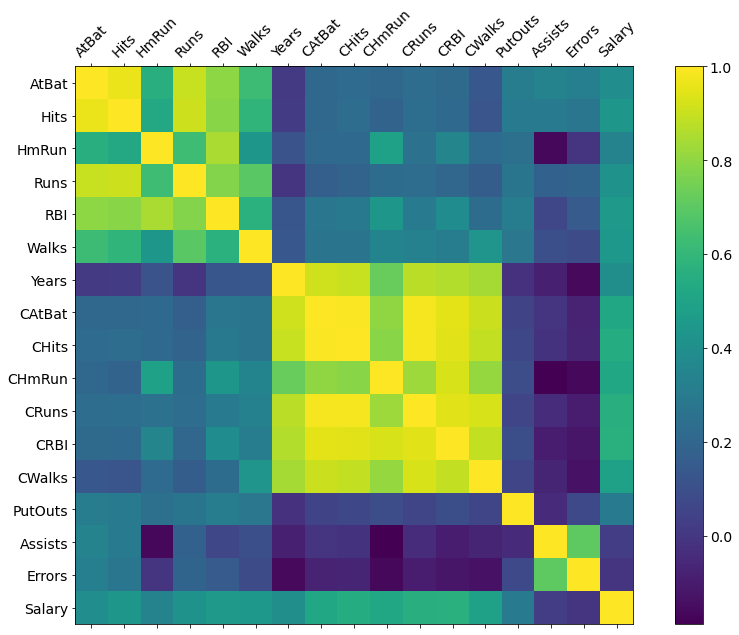

In [6]:
# Correlación de variables

f = plt.figure(figsize=(15, 10))
plt.matshow(data_df.corr(), fignum=f.number)
plt.xticks(range(data_df.select_dtypes(['number']).shape[1]), data_df.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(data_df.select_dtypes(['number']).shape[1]), data_df.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)

#### Descripción del salario
A continuación, se describe la información de salario de los bateadores. Se destaca que hay 11 jugadores que tienen salarios mayores que 1500 USD (exceden 1,5 veces el rango intercuartil superior). Estos datos no se considerarán como outliers, entendiendo que en el deporte es usual que algunos pocos jugadores excepcionales tengan salarios considerablemente mayores que el promedio.

Cantidad de jugadores con salario mayor que 1500 USD:


Salary    11
dtype: int64

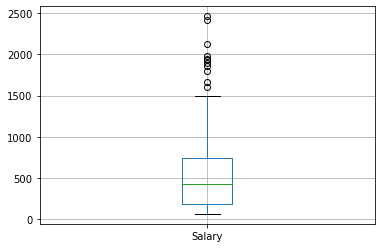

In [7]:
# Descripción del salario
yTotalAuxiliar.boxplot()
yTotalAuxiliar.describe()
print('Cantidad de jugadores con salario mayor que 1500 USD:')
yTotalAuxiliar[yTotalAuxiliar['Salary']>1500].count()

#### Descripción de las variables de desempeño de la temporada de 1986

En la siguiente gráfica se describen las variables de desempeño de los jugadores en la temporada de 1986. Se destaca que *Pouts*, que se refiere a la cantidad de outs, es la variable que presenta mayor cantidad de datos mayores al 1.5 del rango intercuartil superior. 

También se indican valores estadísticos de cada variable.

Estadísticas descriptivas de las variables de desempeño de la termporada de 1986:


,AtBat,Hits,HmRun,Runs,RBI,Walks,PutOuts,Assists,Errors
count,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000
mean,403.642586,107.828897,11.619772,54.745247,51.486692,41.114068,290.711027,118.760456,8.593156
std,147.307209,45.125326,8.757108,25.539816,25.882714,21.718056,279.934575,145.080577,6.606574
min,19.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,282.500000,71.500000,5.000000,33.500000,30.000000,23.000000,113.500000,8.000000,3.000000
50%,413.000000,103.000000,9.000000,52.000000,47.000000,37.000000,224.000000,45.000000,7.000000
75%,526.000000,141.500000,18.000000,73.000000,71.000000,57.000000,322.500000,192.000000,13.000000
max,687.000000,238.000000,40.000000,130.000000,121.000000,105.000000,1377.000000,492.000000,32.000000


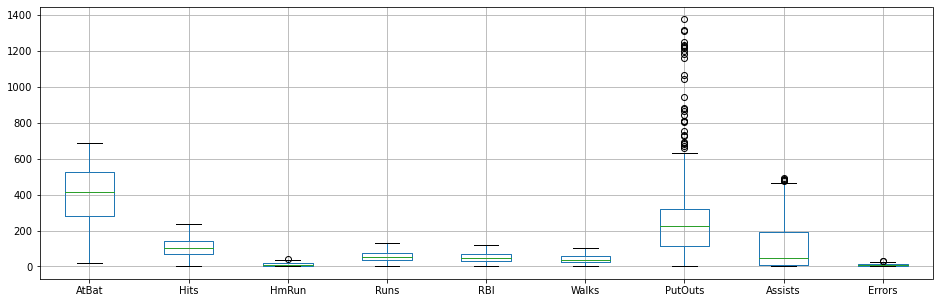

In [8]:
data_df_1986 = pd.DataFrame(data = data_df, columns = ['AtBat', 'Hits', 'HmRun', 'Runs', 'RBI', 'Walks', 'PutOuts', 'Assists','Errors'])
data_df_1986.boxplot(figsize=(16,5))
print('Estadísticas descriptivas de las variables de desempeño de la termporada de 1986:')
data_df_1986.describe()

#### Descripción de las variables de desempeño de la carrera deportiva de los jugadores

En la siguiente gráfica se describen las variables de desempeño de los jugadores en su carrera deportiva. Estas variables tienen una dispersión mayor que las variables presentadas anteriormente. La desviación estándar, en todos los casos, tiene valores similares a la media de cada variable.

También se indican valores estadísticos de cada variable.

Estadísticas descriptivas de las variables de desempeño de la carrera deportiva de los jugadores:


,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks
count,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000
mean,2657.543726,722.186312,69.239544,361.220532,330.418251,260.266160
std,2286.582929,648.199644,82.197581,331.198571,323.367668,264.055868
min,19.000000,4.000000,0.000000,2.000000,3.000000,1.000000
25%,842.500000,212.000000,15.000000,105.500000,95.000000,71.000000
50%,1931.000000,516.000000,40.000000,250.000000,230.000000,174.000000
75%,3890.500000,1054.000000,92.500000,497.500000,424.500000,328.500000
max,14053.000000,4256.000000,548.000000,2165.000000,1659.000000,1566.000000


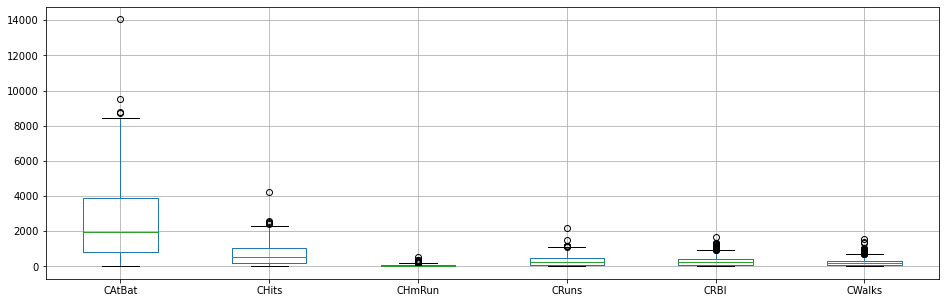

In [9]:
data_df_carrera = pd.DataFrame(data = data_df, columns = ['CAtBat','CHits', 'CHmRun', 'CRuns', 'CRBI', 'CWalks'])
data_df_carrera.boxplot(figsize=(16,5))
print('Estadísticas descriptivas de las variables de desempeño de la carrera deportiva de los jugadores:')
data_df_carrera.describe()

#### Descripción del tiempo jugando en las grandes ligas

En la siguiente gráfica se describen los años que tienen los jugadores en las grandes ligas. El promedio es de 7.3 años. El 25% de los jugadores tiene entre 10 y 24 años en las grandes ligas.

,Years
count,263.000000
mean,7.311787
std,4.793616
min,1.000000
25%,4.000000
50%,6.000000
75%,10.000000
max,24.000000


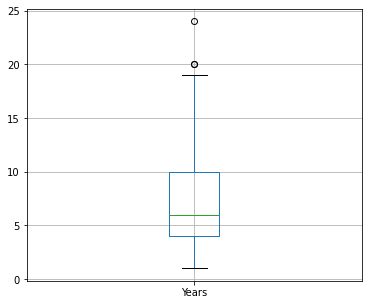

In [10]:
data_df_anios = pd.DataFrame(data = data_df, columns = ['Years'])
data_df_anios.boxplot(figsize=(6,5))
data_df_anios.describe()

### 2. Estimación del modelo usando componentes principales (20 puntos)
Estimen un modelo predictivo usando la muestra de entrenamiento usando componentes principales y evalúen su desempeño en la muestra de test.

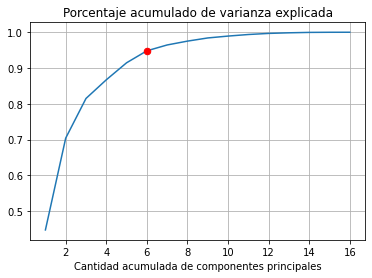

In [11]:
#### Utilicen este espacio para escribir los códigos del procedimiento del punto 2 ####

## estimación del modelo predictivo

# Escalar datos de entrenamiento
scaler = StandardScaler()
scaler.fit(XTrain)
XEscaladoTrain=scaler.transform(XTrain)

# Calcular matriz A y ajustar el modelo
p=len(XEscaladoTrain[1,])
pca = PCA(n_components=p).fit(XEscaladoTrain)
A=pca.components_

# Gráfica de varianza explicada por componentes
varianzaExplicada=pca.explained_variance_
porcentajeVarianzaExplicada=pca.explained_variance_ratio_
plt.plot(range(1,p+1),np.cumsum(porcentajeVarianzaExplicada))
plt.plot(6, np.cumsum(porcentajeVarianzaExplicada)[5], '.', markersize=13, color="r")
plt.xlabel('Cantidad acumulada de componentes principales')
plt.title('Porcentaje acumulado de varianza explicada')
plt.grid()
plt.show()


In [12]:
#### Evaluación del desempeño en la muestra de test

## Función para calcular MSE de PCA con número de componentes como parámetro de entrada

def Funcion_PCA(n_componentes, XEscaladoTrain, A, yTrain, XTest, yTest):
        
    ## Selección de componentes
    nComponentesElegidas=n_componentes
    ZTotalTrain=np.matmul(XEscaladoTrain,A)
    ZTrain = ZTotalTrain[:,range(nComponentesElegidas)]
    regPCA = LinearRegression()
    regPCA.fit(ZTrain, yTrain)
    
    ## Escalar datos test
    XEscaladoTest=scaler.transform(XTest)
    ZTotalTest=np.matmul(XEscaladoTest,A)
    ZTest = ZTotalTest[:,range(nComponentesElegidas)]
    
    ## Calcular predicción y MSE asociado
    prediccionPCA=regPCA.predict(ZTest)
    MSEPCA=np.average(np.square(prediccionPCA-yTest))
          
    return   MSEPCA

nComponentes = 6
MSEPCA = Funcion_PCA(nComponentes, XEscaladoTrain, A, yTrain, XTest, yTest)
print('MSE regresión por componentes principales:')
print(MSEPCA)

MSE regresión por componentes principales:
136530.3550586508


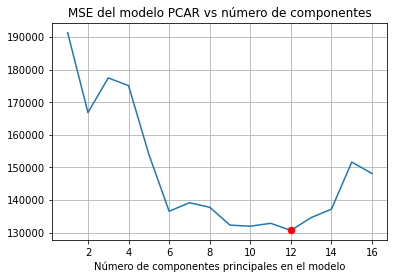

In [13]:
MSEPCA_n = []

for i in range(p):
    nComponentes = i + 1
    MSEPCA_i = Funcion_PCA(nComponentes, XEscaladoTrain, A, yTrain, XTest, yTest)
    MSEPCA_n.append(MSEPCA_i)
    
# Gráfica de MSE_PCA por modelo de n componentes

nComponentes_MSEPCAmin = np.argmin(MSEPCA_n)+1
MSEPCA_n_min = MSEPCA_n[np.argmin(MSEPCA_n)]

plt.plot(range(1,p+1),MSEPCA_n)
plt.plot(nComponentes_MSEPCAmin, MSEPCA_n_min, '.', markersize=13, color="r")
plt.xlabel('Número de componentes principales en el modelo')
plt.title('MSE del modelo PCAR vs número de componentes')
plt.grid()
plt.show()

### Procedimiento para obtener el modelo PCA y evaluar su desempeño:

1. Se realiza el escalamiento de los datos de entrenamiento y se calcula la matriz *A* para realizar la transformación lineal de los datos de entrenamiento.
2. Se ajusta el modelo con los datos de entrenamiento.
3. Se genera una gráfica en la cual se identifica que con 6 componentes se explica el 95% de la varianza.
4. Se calcula el MSE con 6 componentes en el modelo.
5. Se ejecuta una rutina *for* para calcular el MSE cambiando el número de componentes del modelo, desde 1 hasta el total de variables.
6. Se grafica el MSE en relación con el número de componentes del modelo correspondiente. También, se identifica el MSE mínimo.

### Conclusiones

- Con 6 componentes se obtiene un MSE de 136.530, sin embargo, al realizar el cálculo del MSE para todos los posibles componentes se encuentra un MSE menor (130.647) para 12 componentes en el modelo. En este caso, se debe evaluar el balance entre la mejora en el error del modelo y tener el doble de variables en el modelo.

### 3. Estimación del modelo usando PCA y el método forward (30 puntos)
Ahora construyan su propio algoritmo para hacer una regresión por componentes principales, en donde primero calculen los componentes y después realicen un proceso de selección de variables secuencial (forward) que permita encontrar el mejor modelo. Todo lo anterior en la muestra de entrenamiento.

Finalmente, evalúen el desempeño en test.

Una vez hecho este procedimiento respondan a la siguiente pregunta:

¿Es el mismo modelo del punto anterior (punto 2)? 

Evaluación del modelo con 1 variable
Evaluación del modelo con 2 variables
Evaluación del modelo con 3 variables
Evaluación del modelo con 4 variables
Evaluación del modelo con 5 variables
Evaluación del modelo con 6 variables
Evaluación del modelo con 7 variables
Evaluación del modelo con 8 variables
Evaluación del modelo con 9 variables
Evaluación del modelo con 10 variables
Evaluación del modelo con 11 variables
Evaluación del modelo con 12 variables
Evaluación del modelo con 13 variables
Evaluación del modelo con 14 variables
Evaluación del modelo con 15 variables
Evaluación del modelo con 16 variables


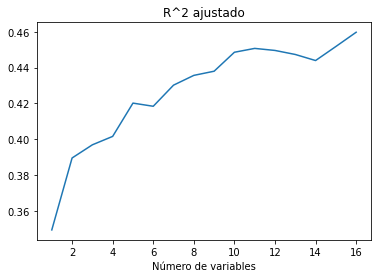

El número de variables seleccionadas es 16 y corresponden a las columnas: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]
MSE regresión por componentes principales:
148138.0439144127


In [16]:
scaler = StandardScaler()
scaler.fit(XTrain)
XEscaladoTrain=scaler.transform(XTrain)

#Matrix A
p=len(XEscaladoTrain[1,])
pca = PCA(n_components=p).fit(XEscaladoTrain)
A=pca.components_




#Componente PCA_forward
nComponentesElegidas_f=16

ZTotalTrain_f=np.matmul(XEscaladoTrain,A)
ZTrain_f = ZTotalTrain_f[:,range(nComponentesElegidas_f)]




#Guardamos la cantidadd de predictores

p_f=len(ZTrain_f[1,])
datosTrain=len(yTrain)

#Arreglo para guardar la métrica
r2adj = []

#Hallar el mejor arreglo

for a in range(1,p_f+1):
    if(a<(p_f)):
        sfs = SequentialFeatureSelector(LinearRegression(), n_features_to_select=a,direction='forward')
        sfs.fit(ZTrain_f, yTrain)
        XTrainSeleccionado=sfs.fit_transform(ZTrain_f, yTrain)
        regAuxiliar = LinearRegression()
        regAuxiliar.fit(XTrainSeleccionado, yTrain)
        r2Modelo=regAuxiliar.score(XTrainSeleccionado, yTrain)
        r2adjModelo=1-(1-r2Modelo)*(datosTrain-1)/(datosTrain-a-1)
        r2adj.append(r2adjModelo)
    else:
        regAuxiliar = LinearRegression()
        regAuxiliar.fit(ZTrain_f, yTrain)
        r2Modelo=regAuxiliar.score(ZTrain_f, yTrain)
        r2adjModelo=1-(1-r2Modelo)*(datosTrain-1)/(datosTrain-a-1)
        r2adj.append(r2adjModelo)
    if(a>1):
        mensaje = ['Evaluación del modelo con', str(a),'variables']
    else:
        mensaje = ['Evaluación del modelo con', str(a),'variable']
    
    print(" ".join(mensaje))
    
r2adj

    
plt.plot(range(1,p_f+1),r2adj)
plt.xlabel('Número de variables')
plt.title('R^2 ajustado')
plt.show()



#Mejor modelo

nVariablesSeleccionadas_f=np.argmax(r2adj)+1

if(nVariablesSeleccionadas_f<p_f):
    sfsElegido = SequentialFeatureSelector(LinearRegression(), n_features_to_select=nVariablesSeleccionadas_f)
    sfsElegido.fit(ZTrain_f, yTrain)
    XTrainSeleccionado=sfsElegido.fit_transform(ZTrain_f, yTrain)
    modeloFwd = LinearRegression()
    modeloFwd.fit(XTrainSeleccionado, yTrain)
    variablesSeleccionadas=np.array(range(1,p+1))[sfsElegido.get_support()]
else:
    modeloFwd = LinearRegression()
    modeloFwd.fit(ZTrain_f, yTrain)
    variablesSeleccionadas=np.array(range(1,p_f+1))
    
mensaje = ['El número de variables seleccionadas es', str(nVariablesSeleccionadas_f),'y corresponden a las columnas:',str(variablesSeleccionadas)]
print(" ".join(mensaje))


regPCA_f = LinearRegression()
regPCA_f.fit(ZTrain_f, yTrain)


#Transformación de la muestra test
XEscaladoTest=scaler.transform(XTest)

#Transformación de variables
ZTotalTest=np.matmul(XEscaladoTest,A)
ZTest_f = ZTotalTest[:,range(nComponentesElegidas_f)]

#Predicción 
prediccionPCA_f=regPCA_f.predict(ZTest_f)
MSEPCA_f=np.average(np.square(prediccionPCA_f-yTest))
print('MSE regresión por componentes principales:')
print(MSEPCA_f)





### Procedimiento para obtener el modelo PCA y método forward:

1. Se realiza el escalamiento de los datos de entrenamiento y se calcula la matriz *A* para realizar la transformación lineal de los datos de entrenamiento.
2. Se ajusta el modelo con los datos de entrenamiento.
3. Se eligen los 16 predíctores del modelo para realizar el método forward y se calcula el r2adj para los modelos desde 1 hasta 16 variables.
4. Se gráfican los r2adj versus el número de variables.
5. Se elige el modelo con el número de variables donde el r2adj es mayor.


### Conclusiones

- Utilizando el PCA y el método forward para elegir el número de componentes se obtuvo que el modelo con 16 variables era el que presentaba un r2adj mayor con un MSE de 148.138
- Con respecto al punto anterior, son modelos diferentes ya que utilizando el método gráfico se eliminaron 10 variables y se obtuvo un MSE mejor. 

### 4. Estimación del modelo de partial least squares (20 puntos)
Predigan usando partial least squares y evalúen en la muestra de test. Concluyan sobre el poder predictivo del modelo estimado.

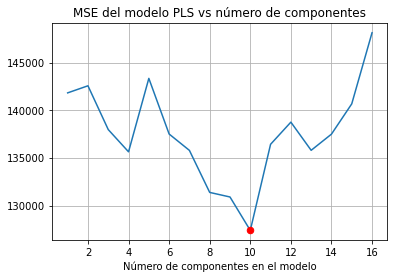

In [17]:
## Función para calcular MSE de PLS con número de componentes como parámetro de entrada

def Funcion_PLS(nComponentes, XTrain, yTrain, XTest, yTest):
    
    ## Definición del modelo
    pls = PLSRegression(n_components=nComponentes)
    pls.fit(XTrain, yTrain)

    ## Cálculo de la predicción
    prediccionPLS=pls.predict(XTest)
    prediccionPLS=np.hstack(prediccionPLS)

    ## Cálculo del MSE
    MSEPLS=np.average(np.square(prediccionPLS-yTest))
    
    return    MSEPLS

## Rutina para calcular MSE con modelo PLS para diferente número de componentes  

p=len(XTrain[1,])
MSEPLS_Forward = []

for n in range(p):
    nComponentes = n + 1
    MSEPLS_Forward_n = Funcion_PLS(nComponentes, XTrain, yTrain, XTest, yTest)
    MSEPLS_Forward.append(MSEPLS_Forward_n)
    
# Gráfica de MSE_PLS por modelo de n componentes

nComponentes_MSEPLSmin = np.argmin(MSEPLS_Forward)+1
MSEPLS_Forward_min = MSEPLS_Forward[np.argmin(MSEPLS_Forward)]

plt.plot(range(1,p+1),MSEPLS_Forward)
plt.plot(nComponentes_MSEPLSmin, MSEPLS_Forward_min, '.', markersize=13, color="r")
plt.xlabel('Número de componentes en el modelo')
plt.title('MSE del modelo PLS vs número de componentes')
plt.grid()
plt.show()




(Utilicen este espacio para describir su procedimiento y escribir su análisis y conclusiones sobre el punto 4)

### Procedimiento para obtener el modelo PLS y evaluar su desempeño:

- Antes de aplicar el modelo PCA, separan los datos en dos partes, una parte para entrenar el modelo (representa el 67% de los datos) y otra parte para entrenar el modelo (representa el 33% de los datos)

- Se define la *Funcion_PLS*, que recibe el número de componentes con los cuales se desea estimar el modelo y el conjunto de datos para entrenamiento y prueba. La función retorna el MSE del modelo. A continuación, se describen los pasos que ejecuta la función:

> - Se entrena el modelo PLS con las variables de entrada y la variable de salida
> - Sobre el modelo definido, se realiza la predicción con los datos de prueba
> - Se calcula el MSE a partir de la predicción realizada en el paso anterior y los datos de prueba de la variable de salida

- Se ejecuta una rutina *for* para calcular el MSE con la función *Funcion_PLS*, cambiando el número de componentes del modelo, desde 1 hasta el total de variables.
- Con el resultado anterior, se grafica el MSE con respecto al número de componentes del modelo correspondiente. También, se identifica el MSE mínimo.

### Conclusiones

- Los valores del MSE obtenidos con el método *PLS* son menores que los obtenidos con el método *PCA*. Esto puede estar asociado a que el método *PLS* incluye la variable de salida en la determinación de los componentes. En este caso, el Salario (variable de salida) debe contener alguna información que permite obtener un resultado ligeramente mejor que con el método *PCA*.
- Para el caso de estudio, con 10 componentes se encuentra el mínimo valor MSE. El tamaño pequeño del volumen de datos permite hacer este tipo de análisis exhaustivo.




### 5. Estimación de un modelo de penalización (15 puntos)
Predigan usando un modelo de penalización y evalúen en la muestra de test. Concluyan sobre el poder predictivo del modelo estimado.

El parámetro de penalización es:
90.11018251665018
El valor del R^2 es:
0.5015370823967193
Los coeficientes estimados son:
[-0.92476906  2.60155824  2.06081983  0.          1.23983594  3.51473877
  0.         -0.4814365   1.88233463  1.04328762  0.59278481 -0.3238834
 -0.24569462  0.24792732  0.09616806 -0.        ]


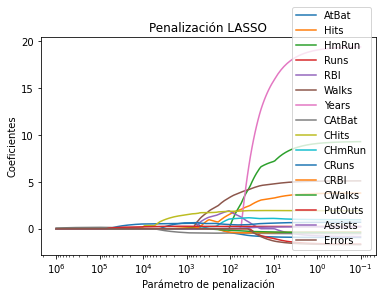

MSE regresión con penalización tipo LASSO:
144606.08268190388


In [18]:
#### Utilicen este espacio para escribir los códigos del procedimiento del punto 5 ####

## Elaboración y calibración del modelo
n_alphas = 200
alphasCalibrar = np.logspace(-1, 6, n_alphas)
modeloLASSO = LassoCV(alphas=alphasCalibrar).fit(XTrain, yTrain)

## Imprimir parámetros del modelo

print('El parámetro de penalización es:')
print(modeloLASSO.alpha_)
print('El valor del R^2 es:')
print(modeloLASSO.score(XTrain, yTrain))
print('Los coeficientes estimados son:')
print(modeloLASSO.coef_)

# Gráfica de coeficientes vs valor de penalización

coefs = []
for a in alphasCalibrar:
    lasso = Lasso(alpha=a, fit_intercept=False,max_iter=10000)
    lasso.fit(XTrain, yTrain)
    coefs.append(lasso.coef_)

# Presentación de resultados

ax = plt.gca()

ax.plot(alphasCalibrar, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('Parámetro de penalización')
plt.ylabel('Coeficientes')
plt.title('Penalización LASSO')
plt.axis('tight')
plt.legend(['AtBat', 'Hits', 'HmRun', 'Runs', 'RBI', 'Walks', 'Years', 'CAtBat',
       'CHits', 'CHmRun', 'CRuns', 'CRBI', 'CWalks', 'PutOuts', 'Assists',
       'Errors'], loc ="lower right")

plt.show()

# Cálculo del MSE

prediccionLASSO=modeloLASSO.predict(XTest)
MSELASSO=np.average(np.square(prediccionLASSO-yTest))
print('MSE regresión con penalización tipo LASSO:')
print(MSELASSO)

(Utilicen este espacio para describir su procedimiento y escribir su análisis y conclusiones sobre el punto 5)

### 6. Elección del mejor modelo (5 puntos)
¿Cuál modelo de los estimados en este caso resulta mejor para la predicción de la variable de respuesta? Justifiquen su respuesta.

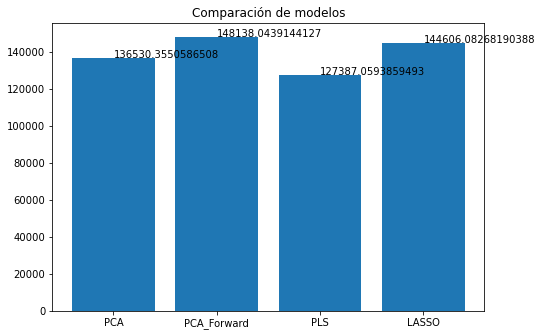

In [20]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title("Comparación de modelos")
ejeX = ['PCA', 'PCA_Forward', 'PLS', 'LASSO']
ejeY = [MSEPCA ,MSEPCA_f, MSEPLS_Forward_min , MSELASSO]
ax.bar(ejeX,ejeY)
def addlabels(x,y,plotP):
    for i in range(len(x)):
        plotP.text(i,y[i],y[i])
addlabels(ejeX,ejeY,plt)
plt.show()

(Utilicen este espacio para escribir su análisis y conclusiones sobre el punto 6)